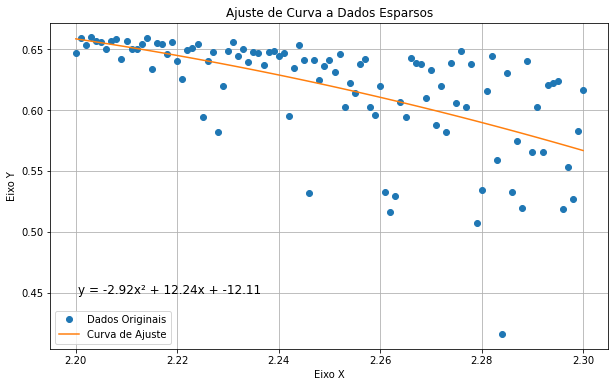

Parâmetros da curva ajustada:
a = -2.9226
b = 12.2355
c = -12.1145


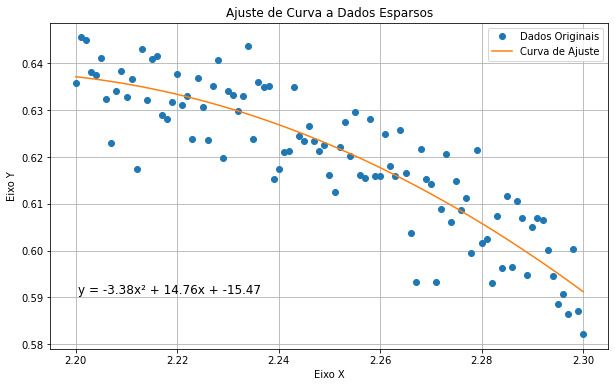

Parâmetros da curva ajustada:
a = -3.3827
b = 14.7632
c = -15.4694


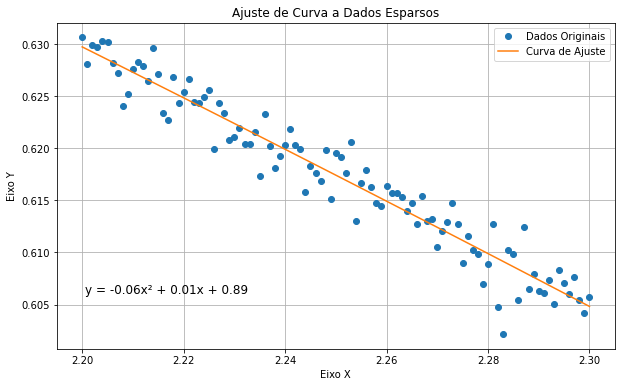

Parâmetros da curva ajustada:
a = -0.0571
b = 0.0081
c = 0.8885


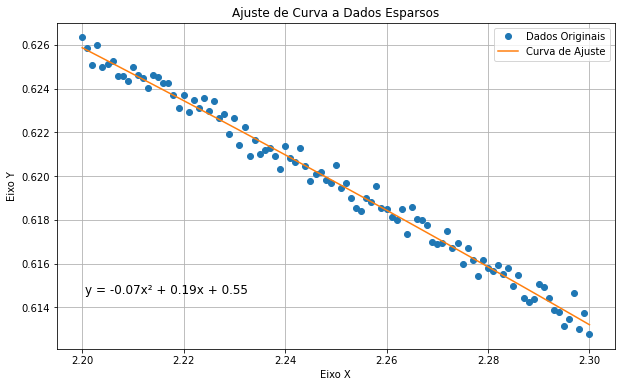

Parâmetros da curva ajustada:
a = -0.0710
b = 0.1928
c = 0.5452


In [40]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def curve_function(x, a, b, c):
    """
    Função para o ajuste da curva (polinômio de segundo grau).
    Altere esta função se seus dados seguirem outro padrão.
    """
    return a * x**2 + b * x + c

def fit_and_plot_data(file_path):
    """
    Lê os dados de um arquivo, ajusta uma curva e plota o resultado.
    
    Args:
        file_path (str): O caminho completo para o arquivo de dados.
    """
    try:
        # Lê o arquivo de dados com um delimitador mais robusto e sem cabeçalho
        df = pd.read_csv(file_path, sep=r'\s+', header=None)
        
        # Acessa os dados nas colunas 0 (x) e 5 (y)
        x_data = df.iloc[:, 0].values
        y_data = df.iloc[:, 5].values
        
        # Filtra valores inválidos (NaNs e infinitos)
        valid_indices = np.isfinite(x_data) & np.isfinite(y_data)
        x_data = x_data[valid_indices]
        y_data = y_data[valid_indices]
        
        if len(x_data) < 3:
            print("Dados insuficientes para o ajuste de curva.")
            return

        # Realiza o ajuste da curva
        params, cov = curve_fit(curve_function, x_data, y_data)
        
        # Cria a curva de ajuste para plotagem
        x_fit = np.linspace(min(x_data), max(x_data), 100)
        y_fit = curve_function(x_fit, *params)
        
        # Cria e exibe o gráfico
        plt.figure(figsize=(10, 6))
        plt.plot(x_data, y_data, 'o', label='Dados Originais')
        plt.plot(x_fit, y_fit, '-', label='Curva de Ajuste')
        
        # Formata a equação da curva
        equation = f"y = {params[0]:.2f}x² + {params[1]:.2f}x + {params[2]:.2f}"
        plt.text(0.05, 0.2, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        
        plt.title('Ajuste de Curva a Dados Esparsos')
        plt.xlabel('Eixo X')
        plt.ylabel('Eixo Y')
        plt.legend()
        plt.grid(True)
        plt.show()

        print("Parâmetros da curva ajustada:")
        print(f"a = {params[0]:.4f}")
        print(f"b = {params[1]:.4f}")
        print(f"c = {params[2]:.4f}")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Substitua 'seus_dados.dat' pelo nome do seu arquivo e execute o código
# O caminho abaixo deve apontar para o seu arquivo 'fort.8'
fit_and_plot_data(file_path='/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.32')
fit_and_plot_data(file_path='/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.16')
fit_and_plot_data(file_path='/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8')
fit_and_plot_data(file_path='/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.4')

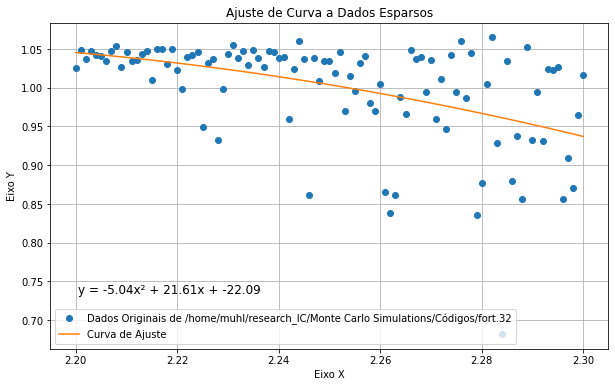

Parâmetros da curva ajustada para /home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.32:
a = -5.0427
b = 21.6095
c = -22.0890


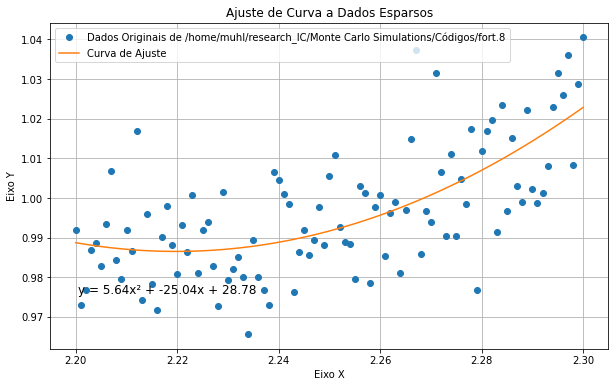

Parâmetros da curva ajustada para /home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8:
a = 5.6406
b = -25.0416
c = 28.7795


In [39]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def curve_function(x, a, b, c):
    """
    Função para o ajuste da curva (polinômio de segundo grau).
    Altere esta função se seus dados seguirem outro padrão.
    """
    return a * x**2 + b * x + c

def fit_and_plot_data(file_path, normalize_by_data=None):
    """
    Lê os dados de um arquivo, ajusta uma curva e plota o resultado.
    
    Args:
        file_path (str): O caminho completo para o arquivo de dados.
        normalize_by_data (np.ndarray, opcional): Um array de dados para normalizar o eixo y.
                                                 Se fornecido, os valores de y_data serão divididos por este array.
    """
    try:
        # Lê o arquivo de dados com um delimitador mais robusto e sem cabeçalho
        df = pd.read_csv(file_path, sep=r'\s+', header=None)
        
        # Acessa os dados nas colunas 0 (x) e 5 (y)
        x_data = df.iloc[:, 0].values
        y_data = df.iloc[:, 5].values
        
        # Filtra valores inválidos (NaNs e infinitos)
        valid_indices = np.isfinite(x_data) & np.isfinite(y_data)
        x_data = x_data[valid_indices]
        y_data = y_data[valid_indices]
        
        # Normaliza os dados se a opção for fornecida
        if normalize_by_data is not None:
            if len(normalize_by_data) != len(y_data):
                print("Erro de normalização: Os dados de normalização têm um tamanho diferente dos dados do arquivo.")
                return
            y_data = y_data / normalize_by_data

        if len(x_data) < 3:
            print("Dados insuficientes para o ajuste de curva.")
            return

        # Realiza o ajuste da curva
        params, cov = curve_fit(curve_function, x_data, y_data)
        
        # Cria a curva de ajuste para plotagem
        x_fit = np.linspace(min(x_data), max(x_data), 100)
        y_fit = curve_function(x_fit, *params)
        
        # Cria e exibe o gráfico
        plt.figure(figsize=(10, 6))
        plt.plot(x_data, y_data, 'o', label=f'Dados Originais de {file_path}')
        plt.plot(x_fit, y_fit, '-', label='Curva de Ajuste')
        
        # Formata a equação da curva
        equation = f"y = {params[0]:.2f}x² + {params[1]:.2f}x + {params[2]:.2f}"
        plt.text(0.05, 0.2, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        
        plt.title('Ajuste de Curva a Dados Esparsos')
        plt.xlabel('Eixo X')
        plt.ylabel('Eixo Y')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Parâmetros da curva ajustada para {file_path}:")
        print(f"a = {params[0]:.4f}")
        print(f"b = {params[1]:.4f}")
        print(f"c = {params[2]:.4f}")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

if __name__ == "__main__":
    # Carrega os dados do arquivo que será usado para normalizar os outros
    try:
        # Substitua 'fort.4' pelo caminho do seu arquivo de referência, se necessário
        normalization_df = pd.read_csv('/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8', sep=r'\s+', header=None)
        normalization_data = normalization_df.iloc[:, 5].values
    except FileNotFoundError:
        normalization_data = None
        print("Arquivo de normalização não encontrado. Os dados não serão normalizados.")

    # Lista de arquivos a serem plotados e ajustados
    files_to_plot = [
        '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.32',
#         '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.16',
#         '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8',
    ]

    # Chama a função para cada arquivo, usando o arquivo de normalização
    for file in files_to_plot:
        fit_and_plot_data(file, normalize_by_data=normalization_data)
        
if __name__ == "__main__":
    # Carrega os dados do arquivo que será usado para normalizar os outros
    try:
        # Substitua 'fort.4' pelo caminho do seu arquivo de referência, se necessário
        normalization_df = pd.read_csv('/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.16', sep=r'\s+', header=None)
        normalization_data = normalization_df.iloc[:, 5].values
    except FileNotFoundError:
        normalization_data = None
        print("Arquivo de normalização não encontrado. Os dados não serão normalizados.")

    # Lista de arquivos a serem plotados e ajustados
    files_to_plot = [
        '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8',
#         '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.16',
#         '/home/muhl/research_IC/Monte Carlo Simulations/Códigos/fort.8',
    ]

    # Chama a função para cada arquivo, usando o arquivo de normalização
    for file in files_to_plot:
        fit_and_plot_data(file, normalize_by_data=normalization_data)
